# pip install lightgbm scikit-learn

In [15]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    cohen_kappa_score,
    roc_curve,
)
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [2]:
# Load your dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")

In [3]:
# Separate features and target
X = data.drop(columns=["Perinatal_Death"])
y = data["Perinatal_Death"]

In [4]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [5]:
# Apply SMOTE to your dataset
X_resampled, y_resampled = smote.fit_resample(X, y)


In [34]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [35]:
# Initialize LightGBM Classifier
lgbm = LGBMClassifier(random_state=42)

In [36]:
# Fit the model on the training data
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3108, number of negative: 3126
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 6234, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498556 -> initscore=-0.005775
[LightGBM] [Info] Start training from score -0.005775


LGBMClassifier(random_state=42)

In [37]:
# Predict on the test data
y_pred = lgbm.predict(X_test)

In [38]:
# Calculate Sensitivity, Specificity, ROC AUC, Accuracy, Precision, Recall, F1 Score, Kappa Statistics
roc_auc = roc_auc_score(label_binarize(y_test, classes=[10, 20]), label_binarize(y_pred, classes=[10, 20]), average='weighted')
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
# Calculate Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Classification Report
class_report = classification_report(y_test, y_pred)


In [39]:
# Print the calculated metrics
print("Sensitivity/Recall:", recall)
print("Specificity:", sensitivity )
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("Kappa Statistics:", kappa)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Sensitivity/Recall: 0.9865269461077845
Specificity: 0.9865269461077845
ROC AUC: 0.9865112070438673
Accuracy: 0.9865269461077845
Precision: 0.9865363525614946
F1 Score: 0.9865266743445702
Kappa Statistics: 0.9730518540017403
Confusion Matrix:
 [[1306   21]
 [  15 1330]]
Classification Report:
               precision    recall  f1-score   support

          10       0.99      0.98      0.99      1327
          20       0.98      0.99      0.99      1345

    accuracy                           0.99      2672
   macro avg       0.99      0.99      0.99      2672
weighted avg       0.99      0.99      0.99      2672



[LightGBM] [Info] Number of positive: 3108, number of negative: 3126
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 6234, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498556 -> initscore=-0.005775
[LightGBM] [Info] Start training from score -0.005775


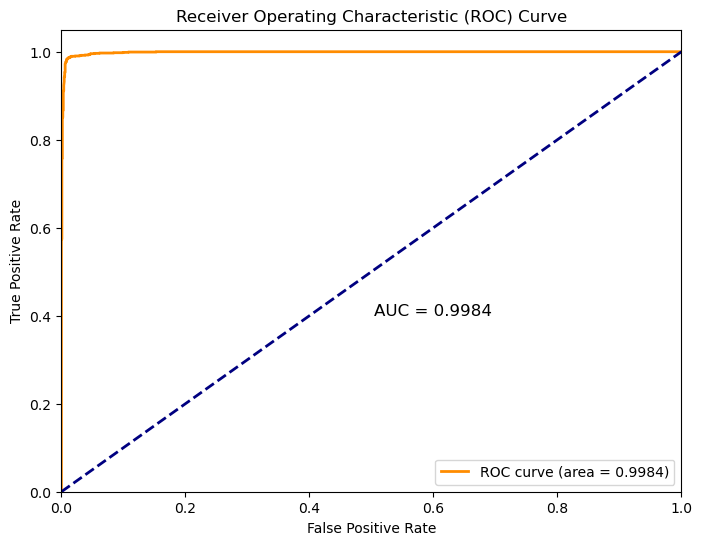

In [43]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize LightGBM Classifier
lgbm = LGBMClassifier(random_state=42)

# Fit the model on the training data
lgbm.fit(X_train, y_train)

# Predict probabilities on the test data
y_scores = lgbm.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Convert labels to binary format
y_test_binary = label_binarize(y_test, classes=[10, 20])

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, y_scores)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Annotate the AUC value on the plot
plt.text(0.6, 0.4, 'AUC = {:.4f}'.format(roc_auc), fontsize=12, ha='center')

# Show the ROC curve plot
plt.legend(loc="lower right")
plt.show()

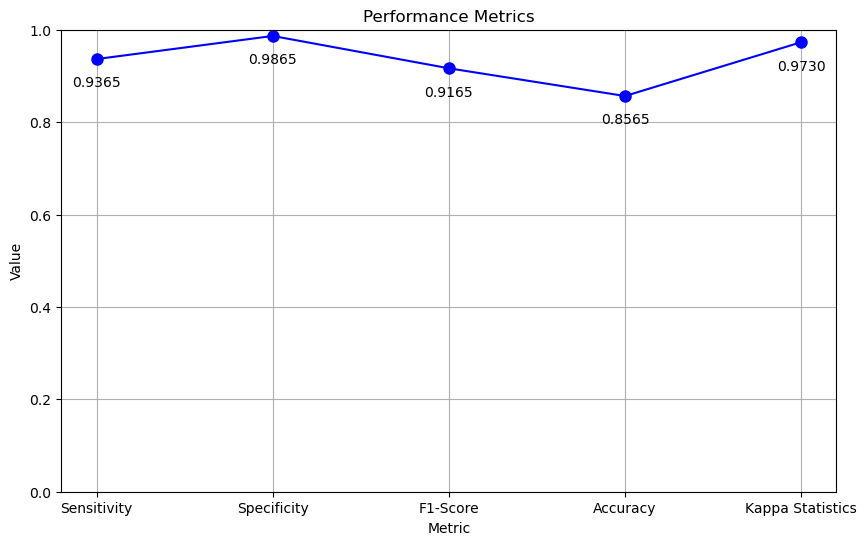

In [8]:
import matplotlib.pyplot as plt

# Define the metrics and their corresponding values
metrics = ['Sensitivity', 'Specificity', 'F1-Score', 'Accuracy', 'Kappa Statistics']
values = [0.9365, 0.9865, 0.9165, 0.8565, 0.9730]

# Define a dark blue color
dark_blue = "#00008B"  # Hex color code for dark blue

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(metrics, values, marker='o', linestyle='-', color='b', markersize=8)
plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ylim(0, 1.0)  # Set the y-axis range to show values touching the top
plt.grid(True)

# Add labels below the data points
for i, value in enumerate(values):
    plt.annotate(f'{value:.4f}', (metrics[i], value), textcoords="offset points", xytext=(0, -20), ha='center')

    
    # Save the plot as a PDF file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/LGBM/test data line plot.svg", format='svg')

# Show the plot
plt.show()


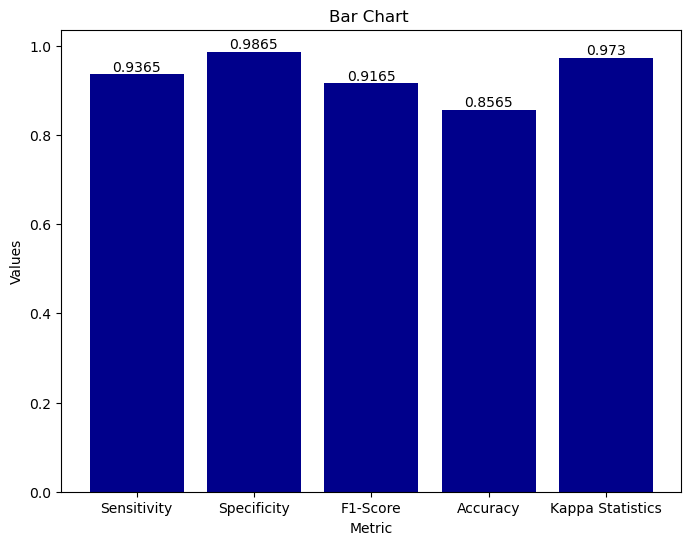

In [7]:
# Create a bar chart with dark blue color
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=dark_blue)

# Add labels and title
plt.xlabel("Metric")
plt.ylabel("Values")
plt.title("Bar Chart ")

# Add values at the middle of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')
    
    
    # Save the plot as a PDF file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/LGBM/test data bar plot.svg", format='svg')
# Show the plot
plt.show()